#### Thirteen cells signature matrix
1. Neutrophils
2. Monocytes
3. B cells
4. CD8 T cells
5. CD4 T cells
6. NK cells
7. Eosinophils
8. Basophils
9. Kupffer
10. Hepatocytes
11. Cholangiocytes
12. Stellate
13. LSEC

In [1]:
Base_dir = 'C:/github/LiverDeconv' # cloning repository

import sys
sys.path.append(Base_dir)
import liver_deconv

import pandas as pd

***
#### Reference preparation

In [2]:
# load data
df_mix = pd.read_csv(Base_dir+'/data/processed/mix_processed.csv',index_col=0)
df_all = pd.read_csv(Base_dir+'/data/processed/ref_13types.csv',index_col=0)

print(df_mix.shape)
df_mix.head()

(11588, 57)


,ANIT_1,ANIT_2,ANIT_3,ANIT_4,APAP_1,APAP_11,APAP_2,APAP_4,APAP_6,APAP_8,...,MDA_8,TAA_1,TAA_3,TAA_6,TAA_7,TAA_8,GAL_2,GAL_4,GAL_7,GAL_8
0610005C13Rik,11.875867,12.148424,11.252824,12.411776,11.733585,11.068134,11.748217,11.856797,12.010466,11.216230,...,12.134986,10.641326,10.482294,10.242923,10.101400,9.562121,9.941478,8.431683,7.700966,8.962926
0610009B22Rik,8.734242,8.457720,8.184438,8.506085,7.542759,8.233699,8.699826,8.748106,8.434342,7.651400,...,8.247180,7.936489,8.039019,7.926510,7.985361,7.755954,8.767225,8.663929,8.546301,8.989601
0610010F05Rik,6.490900,6.421802,5.806085,6.462369,5.565017,6.059207,5.922221,5.990138,5.467135,5.755073,...,6.552560,6.950840,6.120020,6.206200,6.356350,6.086378,4.909432,6.207227,6.382519,6.357380
0610010K14Rik,8.564556,8.673014,8.348932,8.224936,9.066347,8.904317,8.386174,8.778923,8.426116,9.441442,...,8.122928,8.779766,9.291585,9.132055,9.200938,9.173803,9.273967,8.512630,8.407845,8.454941
0610012G03Rik,8.097187,7.933714,7.698964,7.900242,8.162186,7.959631,7.644485,7.770003,8.080504,8.389386,...,7.740478,8.486990,8.506687,7.844173,7.849986,7.853950,8.150181,8.108420,7.913200,8.247160


In [3]:
print(df_all.shape)
df_all.head()

(51463, 113)


,NK_GSE114827_1,NK_GSE114827_2,NK_GSE114827_3,NK_GSE103901_1,NK_GSE103901_2,NK_GSE103901_3,NK_GSE103901_4,NK_GSE103901_5,B_GSE84878_1,B_GSE84878_2,...,LSEC_GSE120281_1,LSEC_GSE120281_2,LSEC_GSE120281_3,LSEC_GSE120282_1,LSEC_GSE120282_2,LSEC_GSE120282_3,LSEC_GSE135789_1,LSEC_GSE135789_2,LSEC_GSE135789_3,LSEC_GSE135789_4
mgi,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,11.216826,23.474148,0.987152,15.364877,31.139537,22.703545,20.156833,29.162144,0.612939,1.192251,...,12.298976,76.916281,41.270084,28.856090,6.702005,17.255757,28.317989,33.905790,4.296730,7.443342
0610006L08Rik,0.000000,0.000000,0.000000,0.000000,0.000000,2.532700,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610009B22Rik,3801.734228,3838.271735,590.980263,1673.625997,1265.782913,660.394232,596.272184,641.598858,424.297827,489.444747,...,139.429684,64.162805,103.716779,113.015607,106.637527,214.289784,849.609673,1282.319472,852.775792,1173.783288
0610009E02Rik,38.492335,26.822363,9.531486,31.225440,5.380941,25.955692,27.520060,22.481986,30.104838,24.581738,...,32.408879,48.411034,51.805864,12.867085,22.047564,14.648481,9.014010,34.387327,18.025384,25.093965
0610009L18Rik,260.189214,144.910984,115.846603,639.627003,664.538873,333.376854,357.646002,390.423509,71.599094,72.398348,...,27.368506,19.615761,17.567439,17.163154,11.899047,23.225588,145.807093,189.147226,166.073179,112.401889


(11588, 57)
(51463, 113)
log2 conversion
quantile normalization
drop nan
narrowd gene number : 11555
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
signature genes : 503


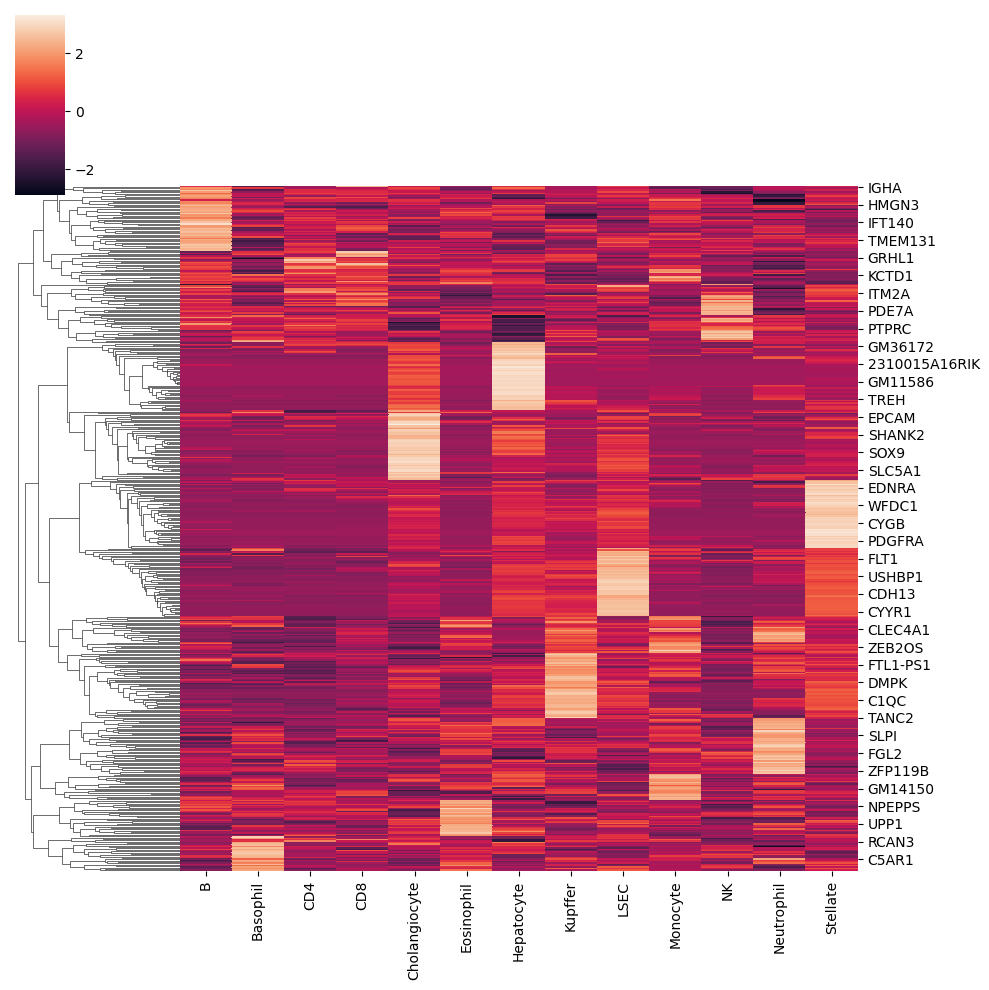

(503, 13)


,B,Basophil,CD4,CD8,Cholangiocyte,Eosinophil,Hepatocyte,Kupffer,LSEC,Monocyte,NK,Neutrophil,Stellate
1810014B01RIK,6.894459,9.558404,6.307025,6.895476,5.230195,5.404626,6.899987,7.073296,3.944545,5.681578,6.401633,0.000000,5.134967
2010003K11RIK,0.000000,0.000000,0.000000,0.000000,3.978261,0.000000,9.132970,0.000000,0.000000,0.000000,0.000000,0.000000,0.390510
2310015A16RIK,0.000000,0.000000,0.000000,0.000000,3.389768,0.000000,10.271526,0.680040,1.057403,0.000000,0.000000,0.000000,1.562233
2510016D11RIK,3.686890,0.000000,4.928871,4.659895,2.962295,5.844088,5.259374,0.610059,3.011108,7.644206,2.240240,4.725220,2.633859
2610301B20RIK,6.451084,8.773068,5.564707,5.838959,6.495640,5.824767,7.129563,6.327372,5.900469,5.890122,6.825659,4.753729,6.333058


In [4]:
dat = liver_deconv.LiverDeconv()
dat.set_data(df_mix=df_mix, df_all=df_all)
dat.pre_processing(do_ann=False,ann_df=None,do_log2=True,do_quantile=True,do_trimming=False,do_drop=True)
dat.narrow_intersec()
dat.create_ref(sep="_",number=50,limit_CV=10,limit_FC=1.5,log2=False,verbose=True,do_plot=True)

final_ref = dat.final_ref
print(final_ref.shape)
final_ref.head()

***
#### 2. Conduct deconvolution with Elastic Net

0 rows are removed
0 rows are removed
number of used genes = 503
fitting method : ElasticNet


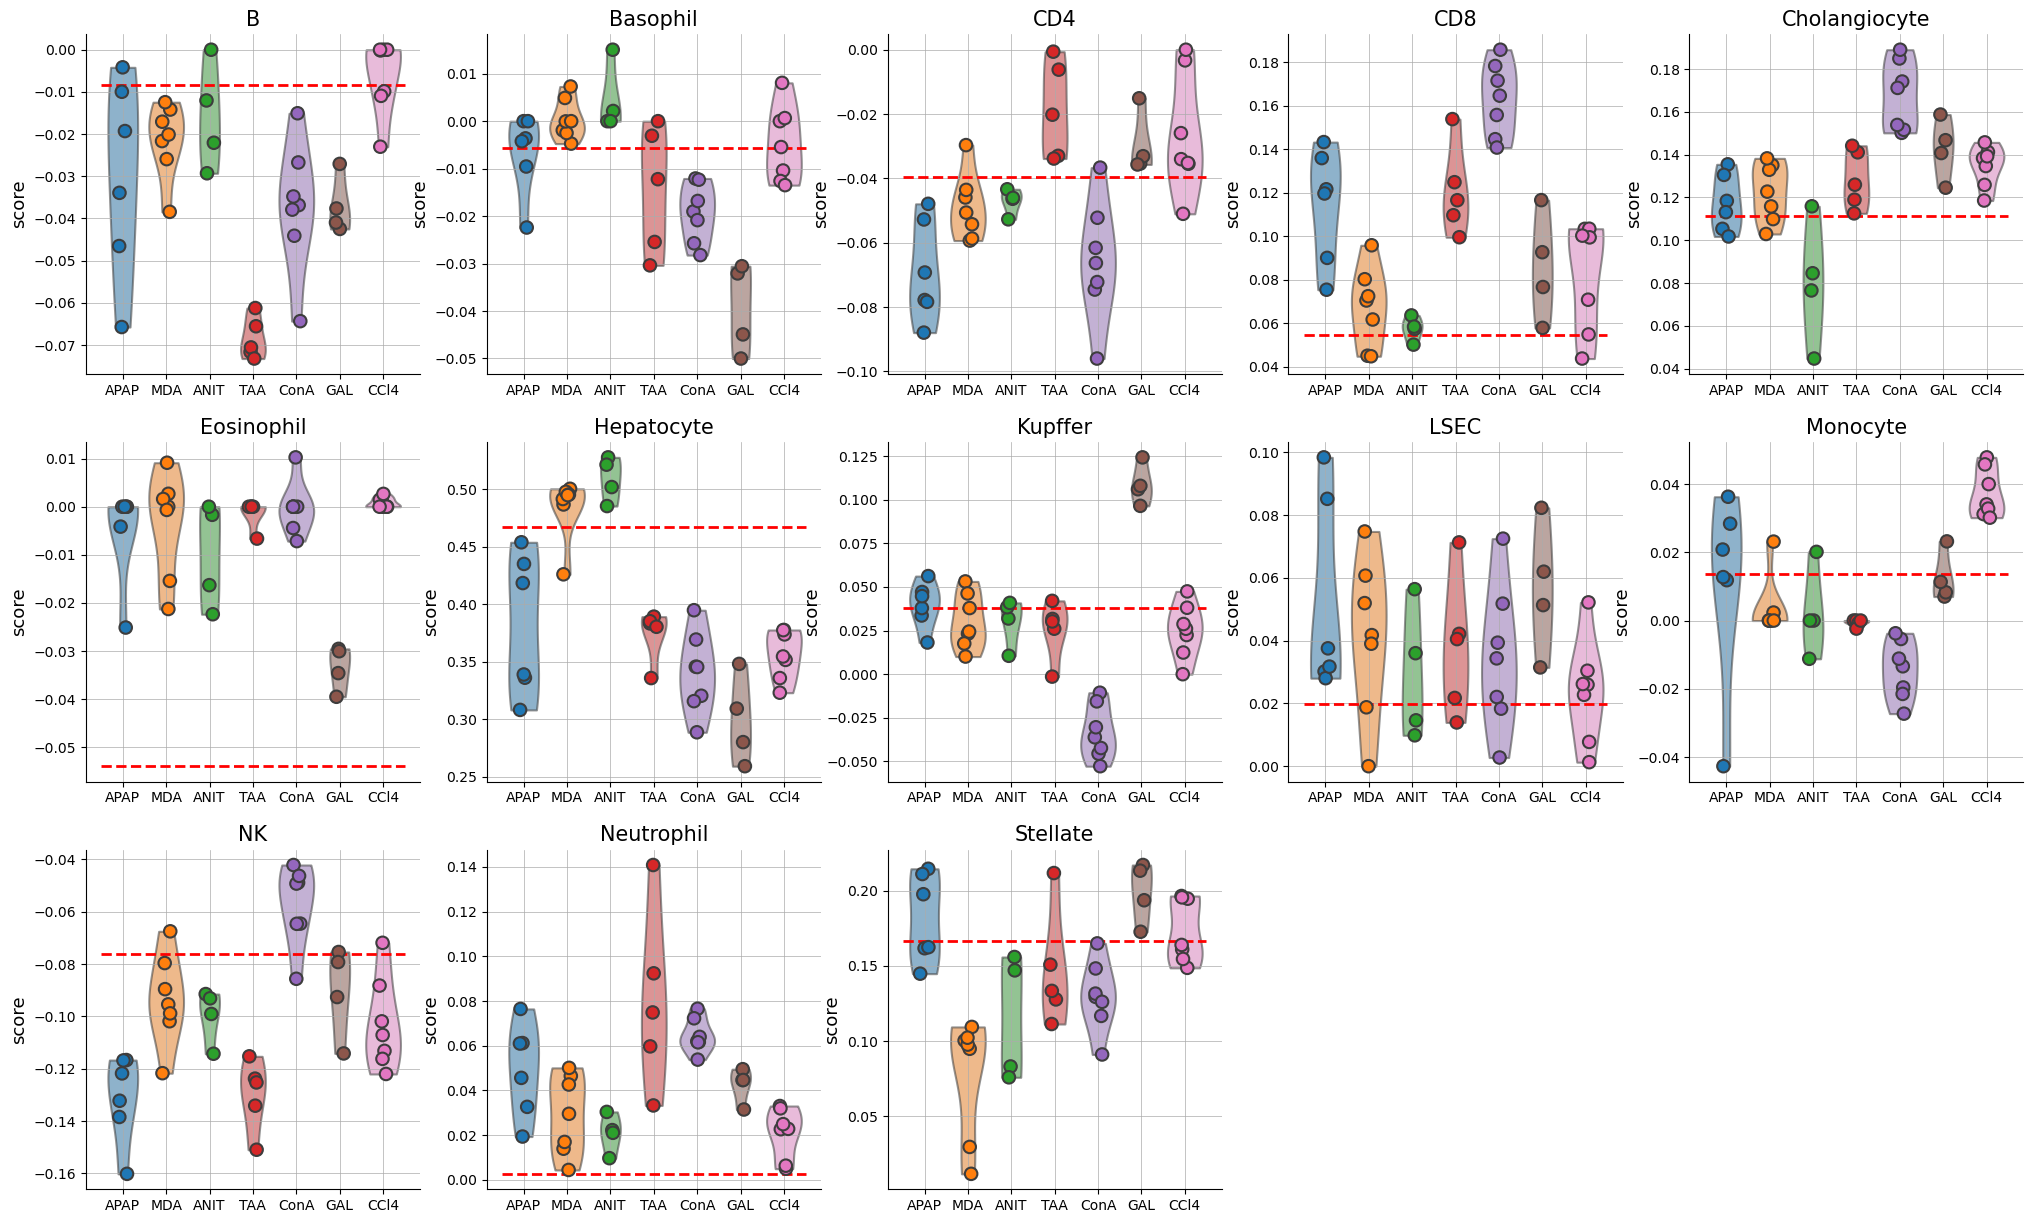

In [5]:
dat.do_fit()
dat.summarize(remove_list=["CIV_7","CIV_8","CIP_7","CIP_8"],
                  sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4"],
                  x_doc="",y_doc="score",ctrl="Ctrl",row_n=3,col_n=5,z_score=False)
res = dat.get_res()

***
#### 3. Validation

standardz population control
original : 57
after removing : 53
standardz population control
----------


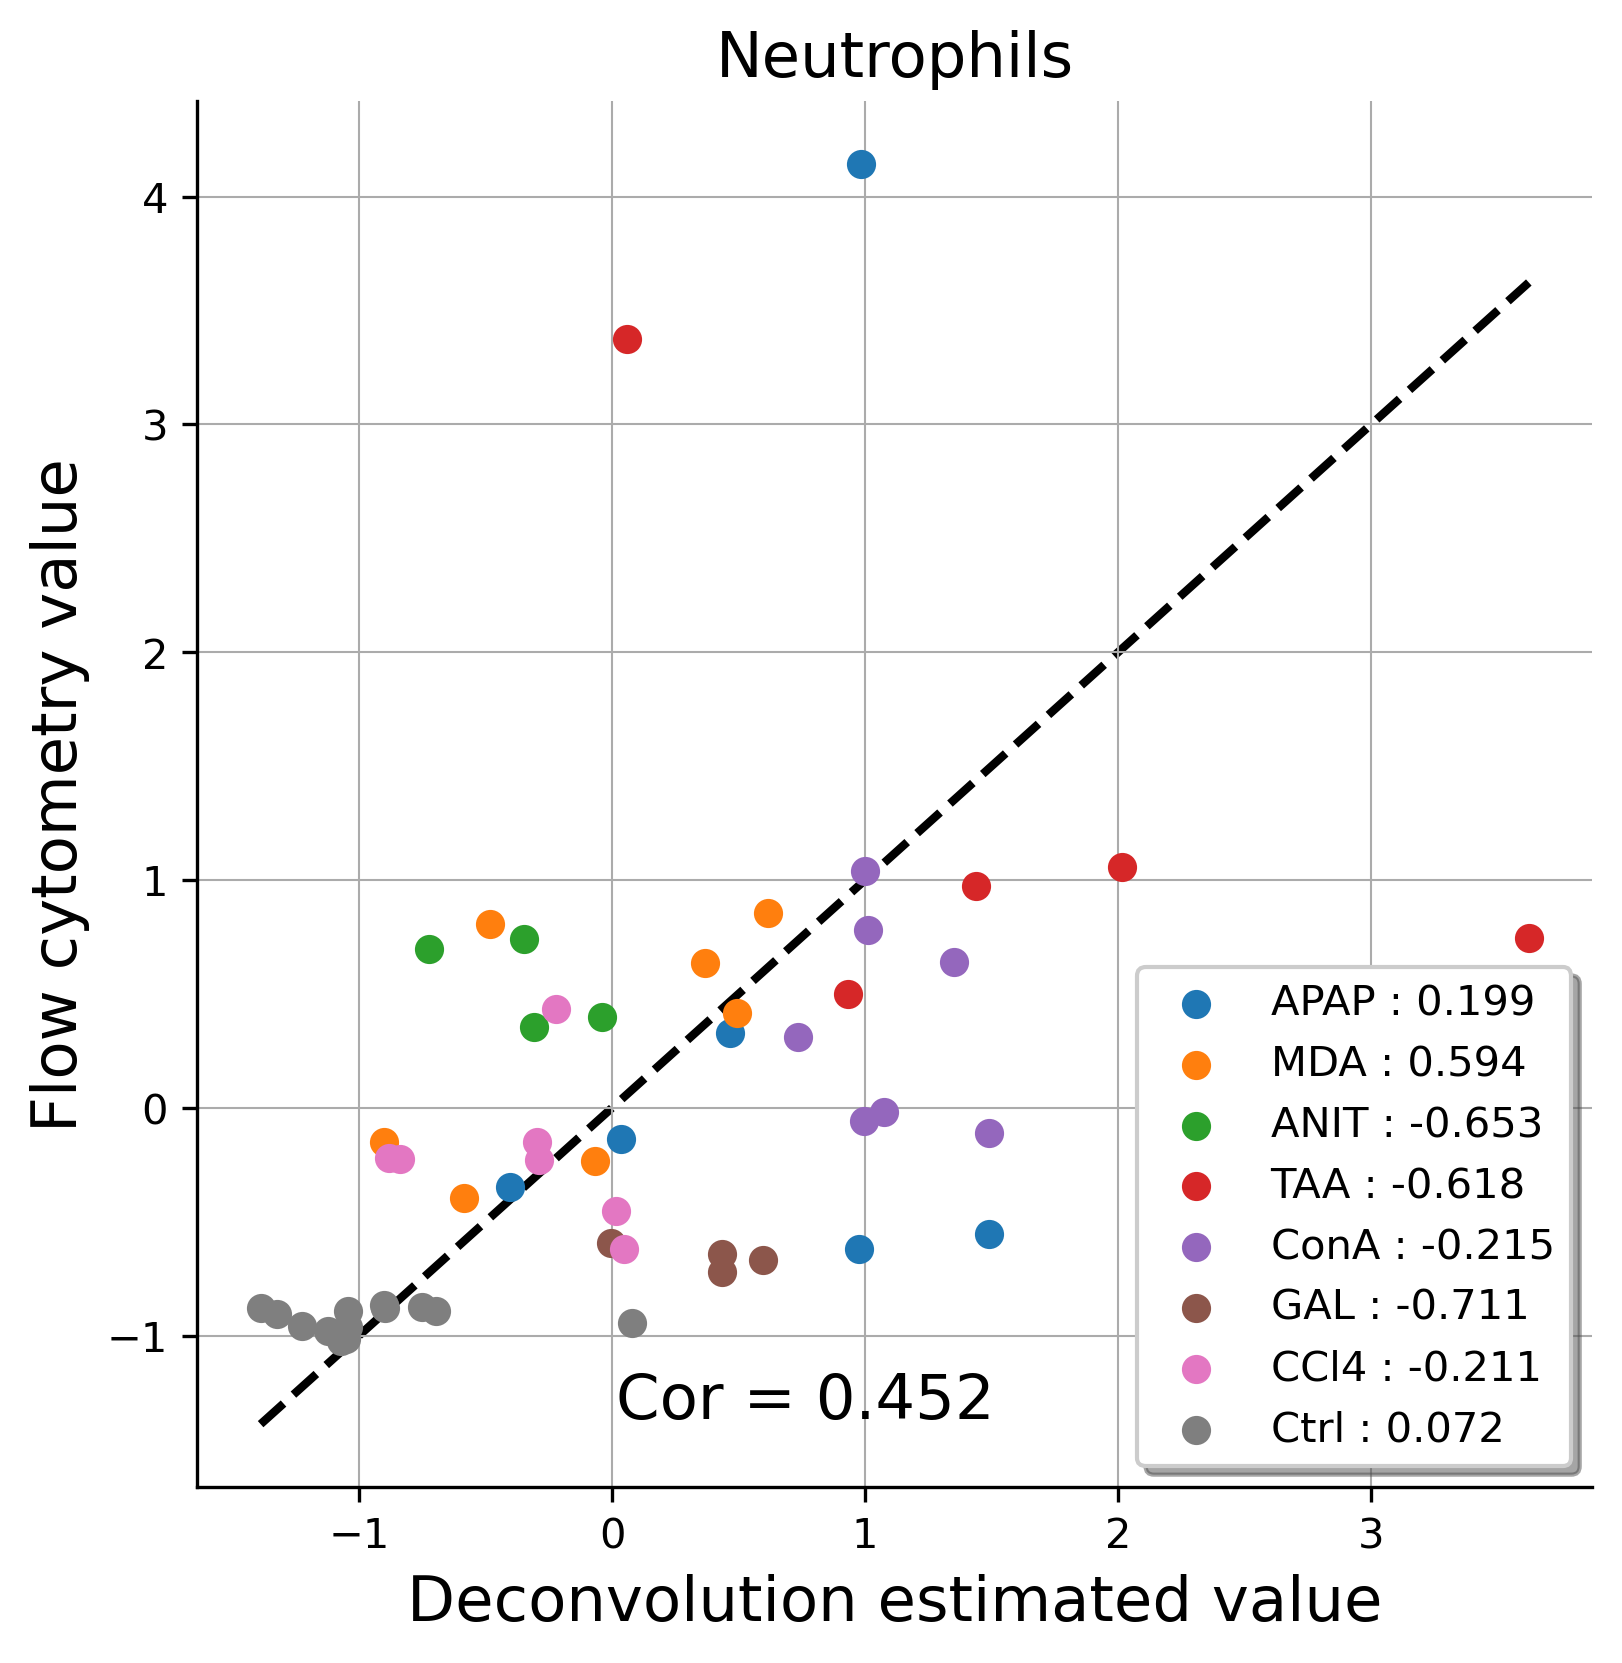

----------


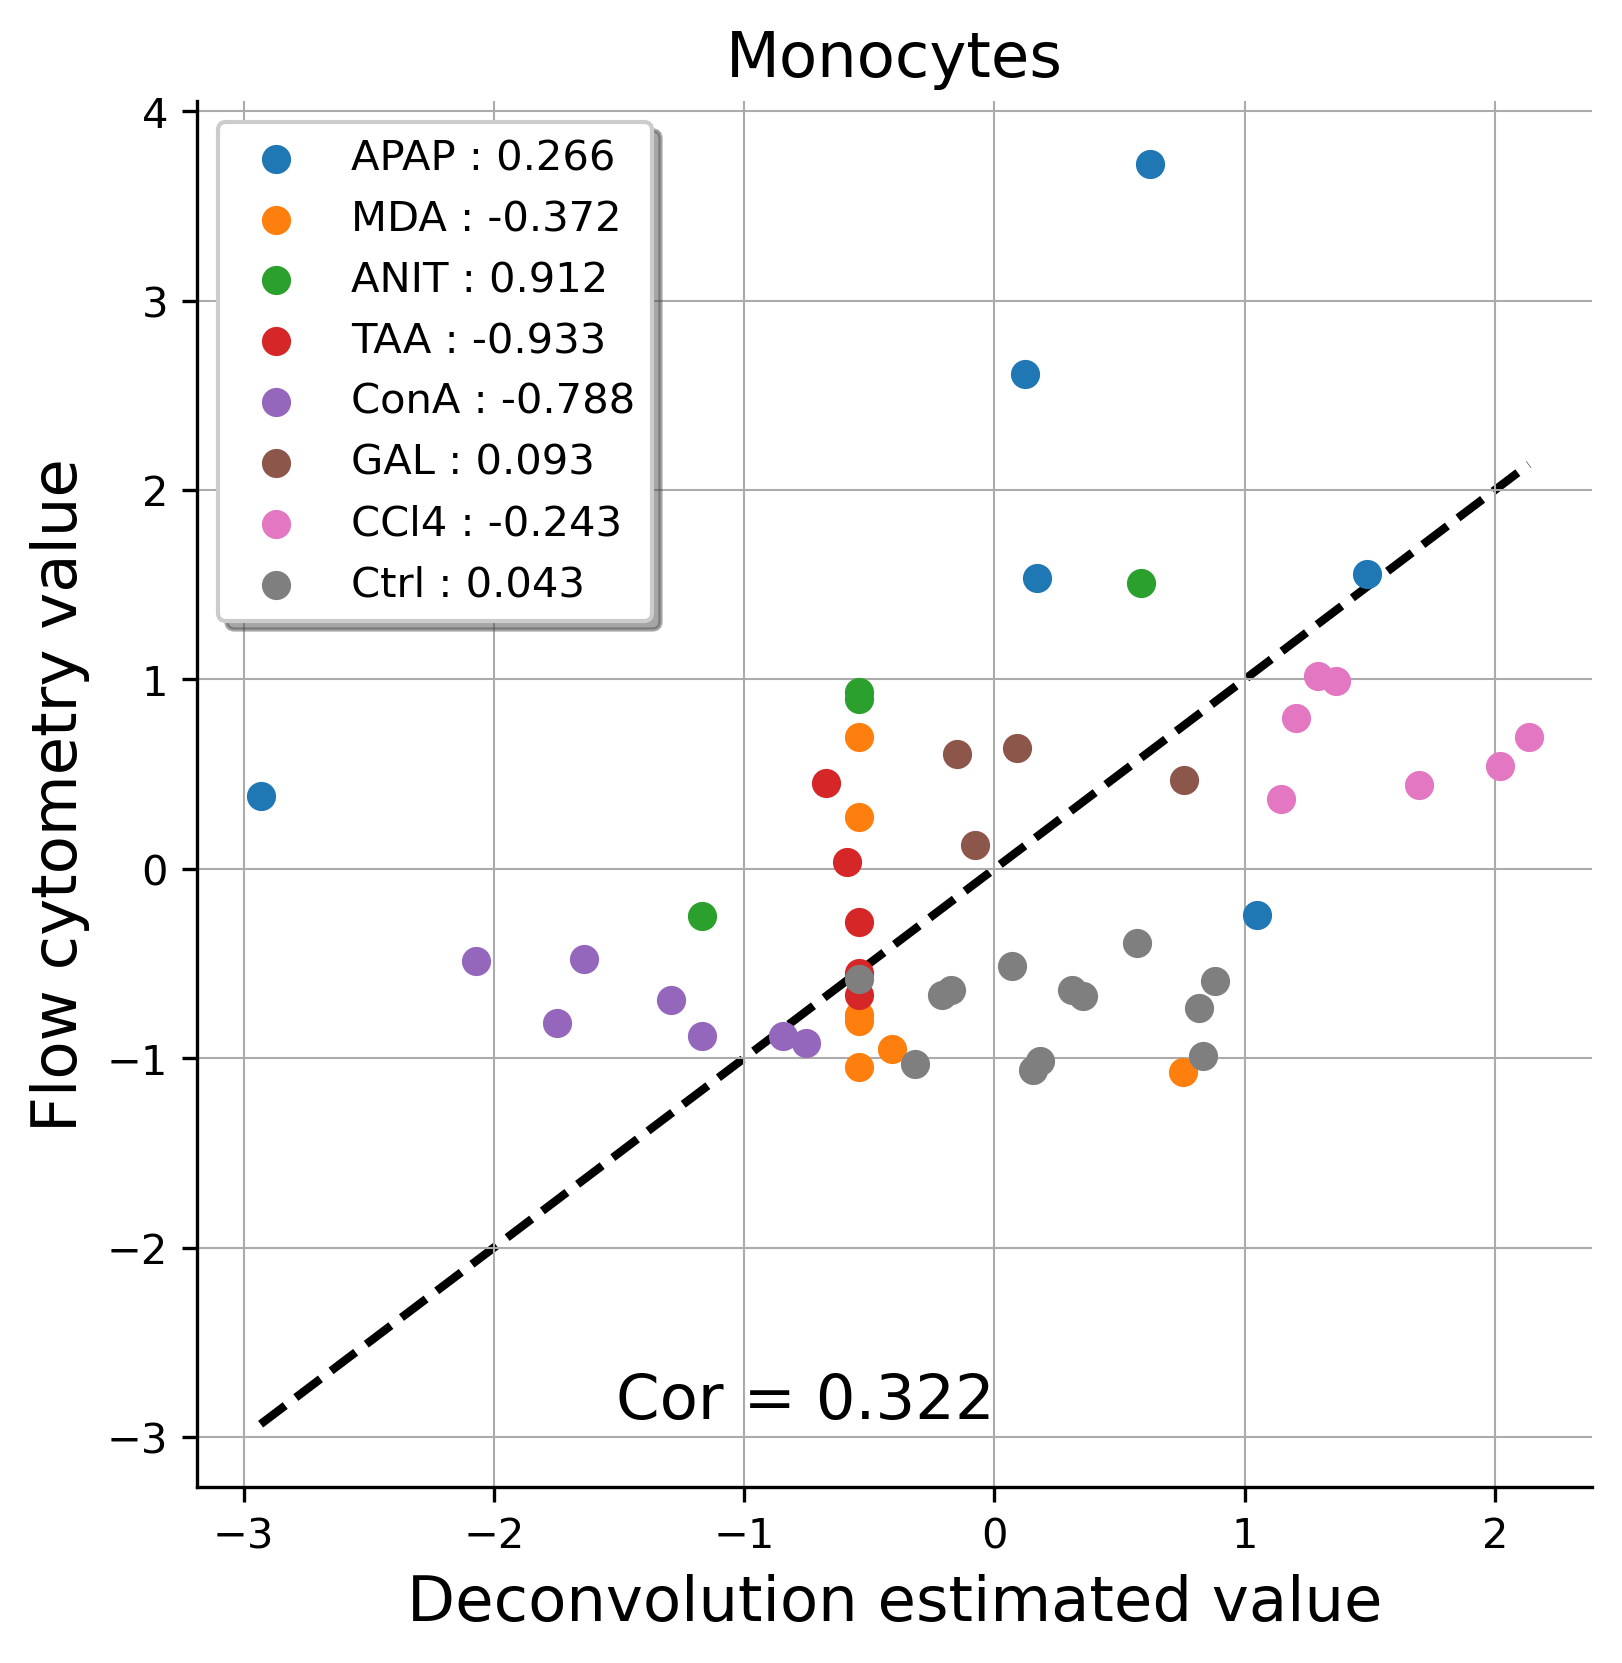

----------


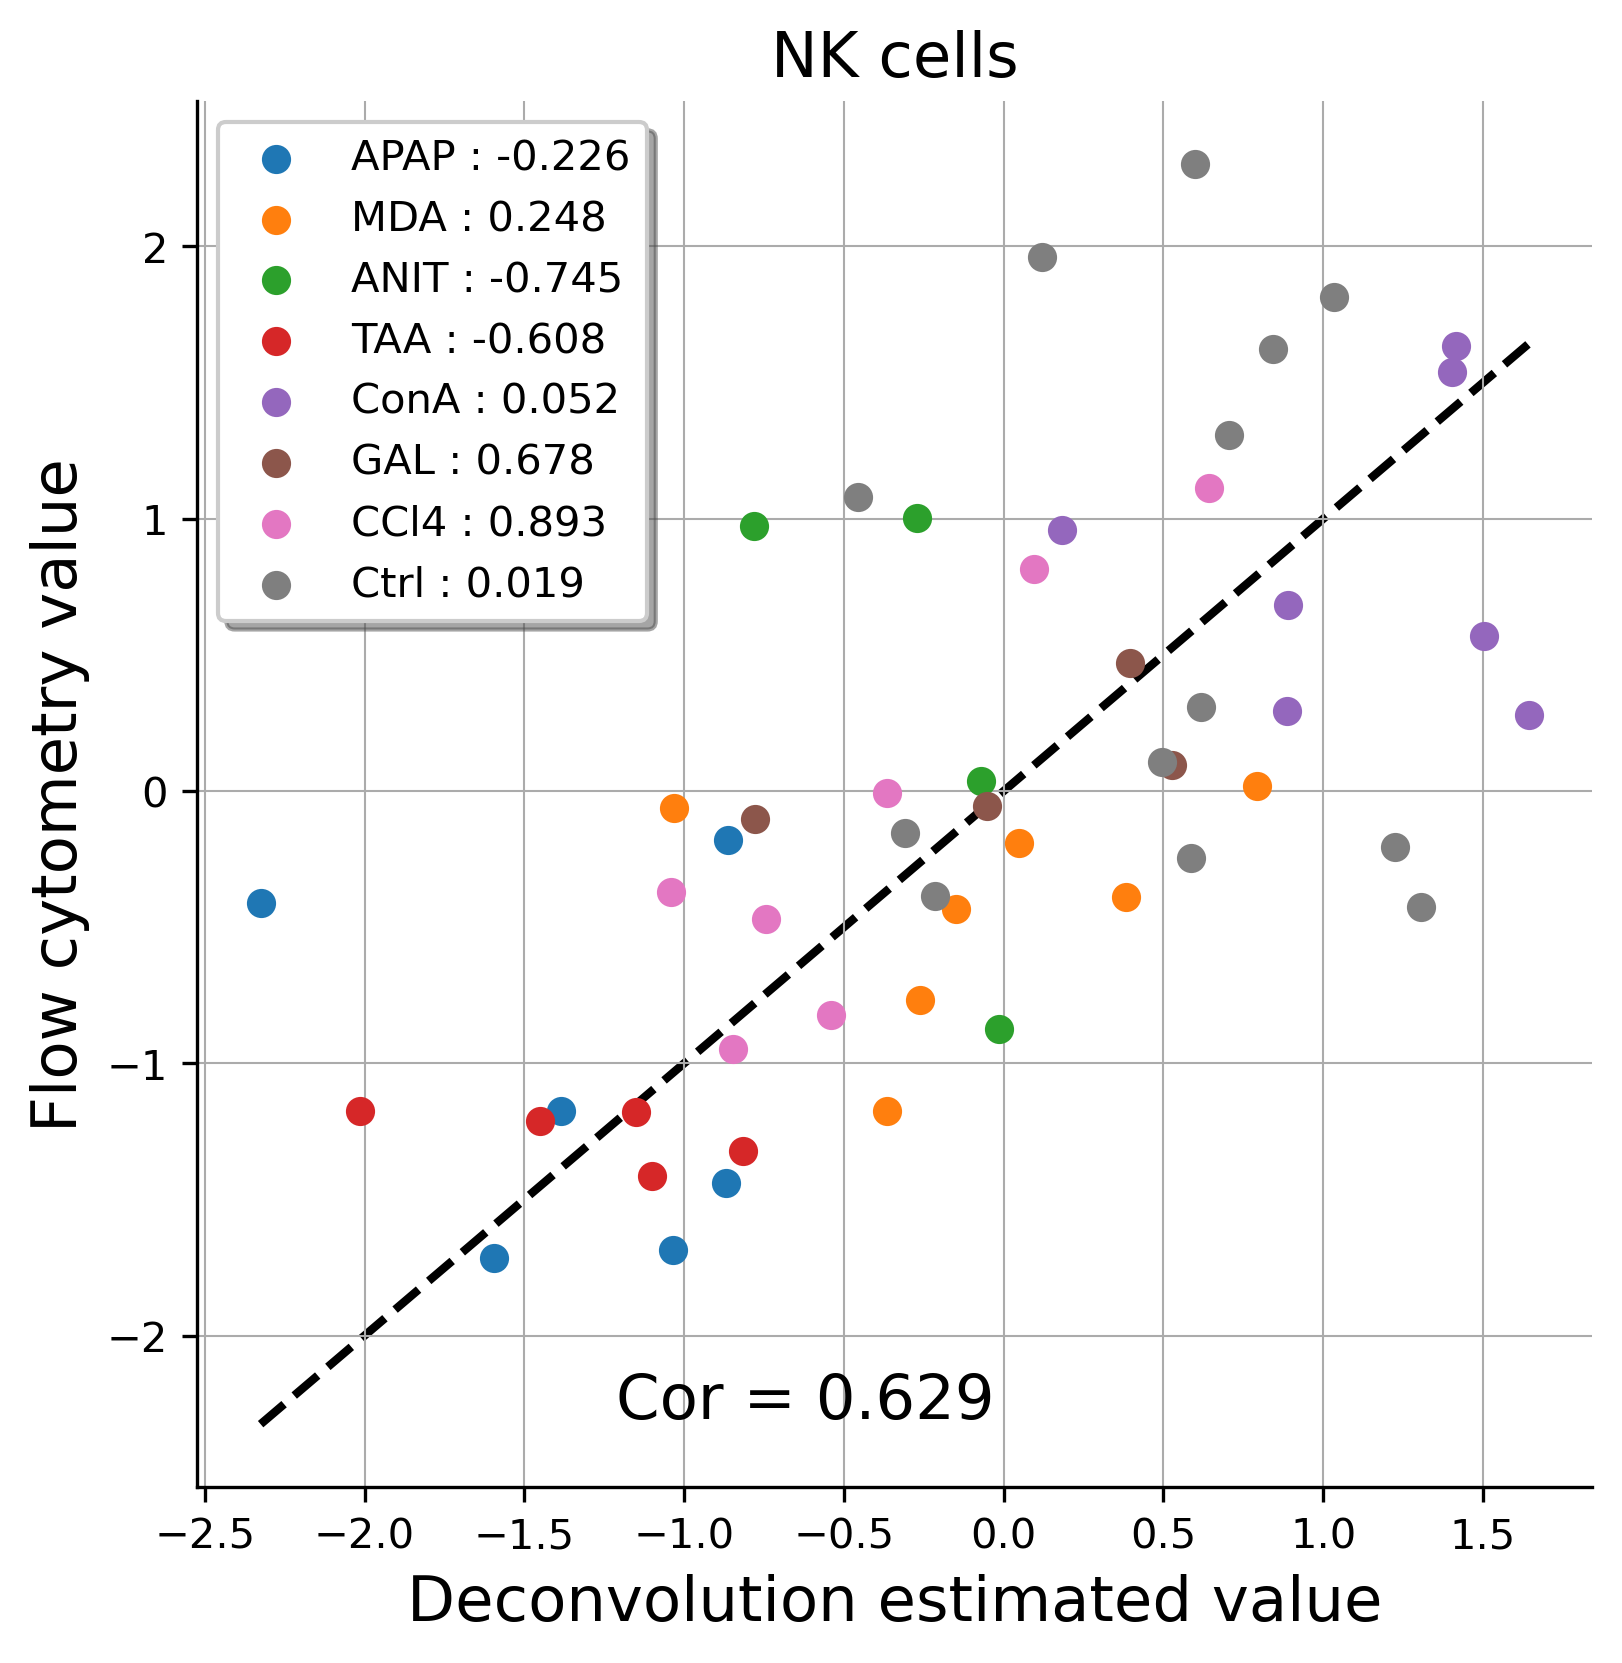

----------


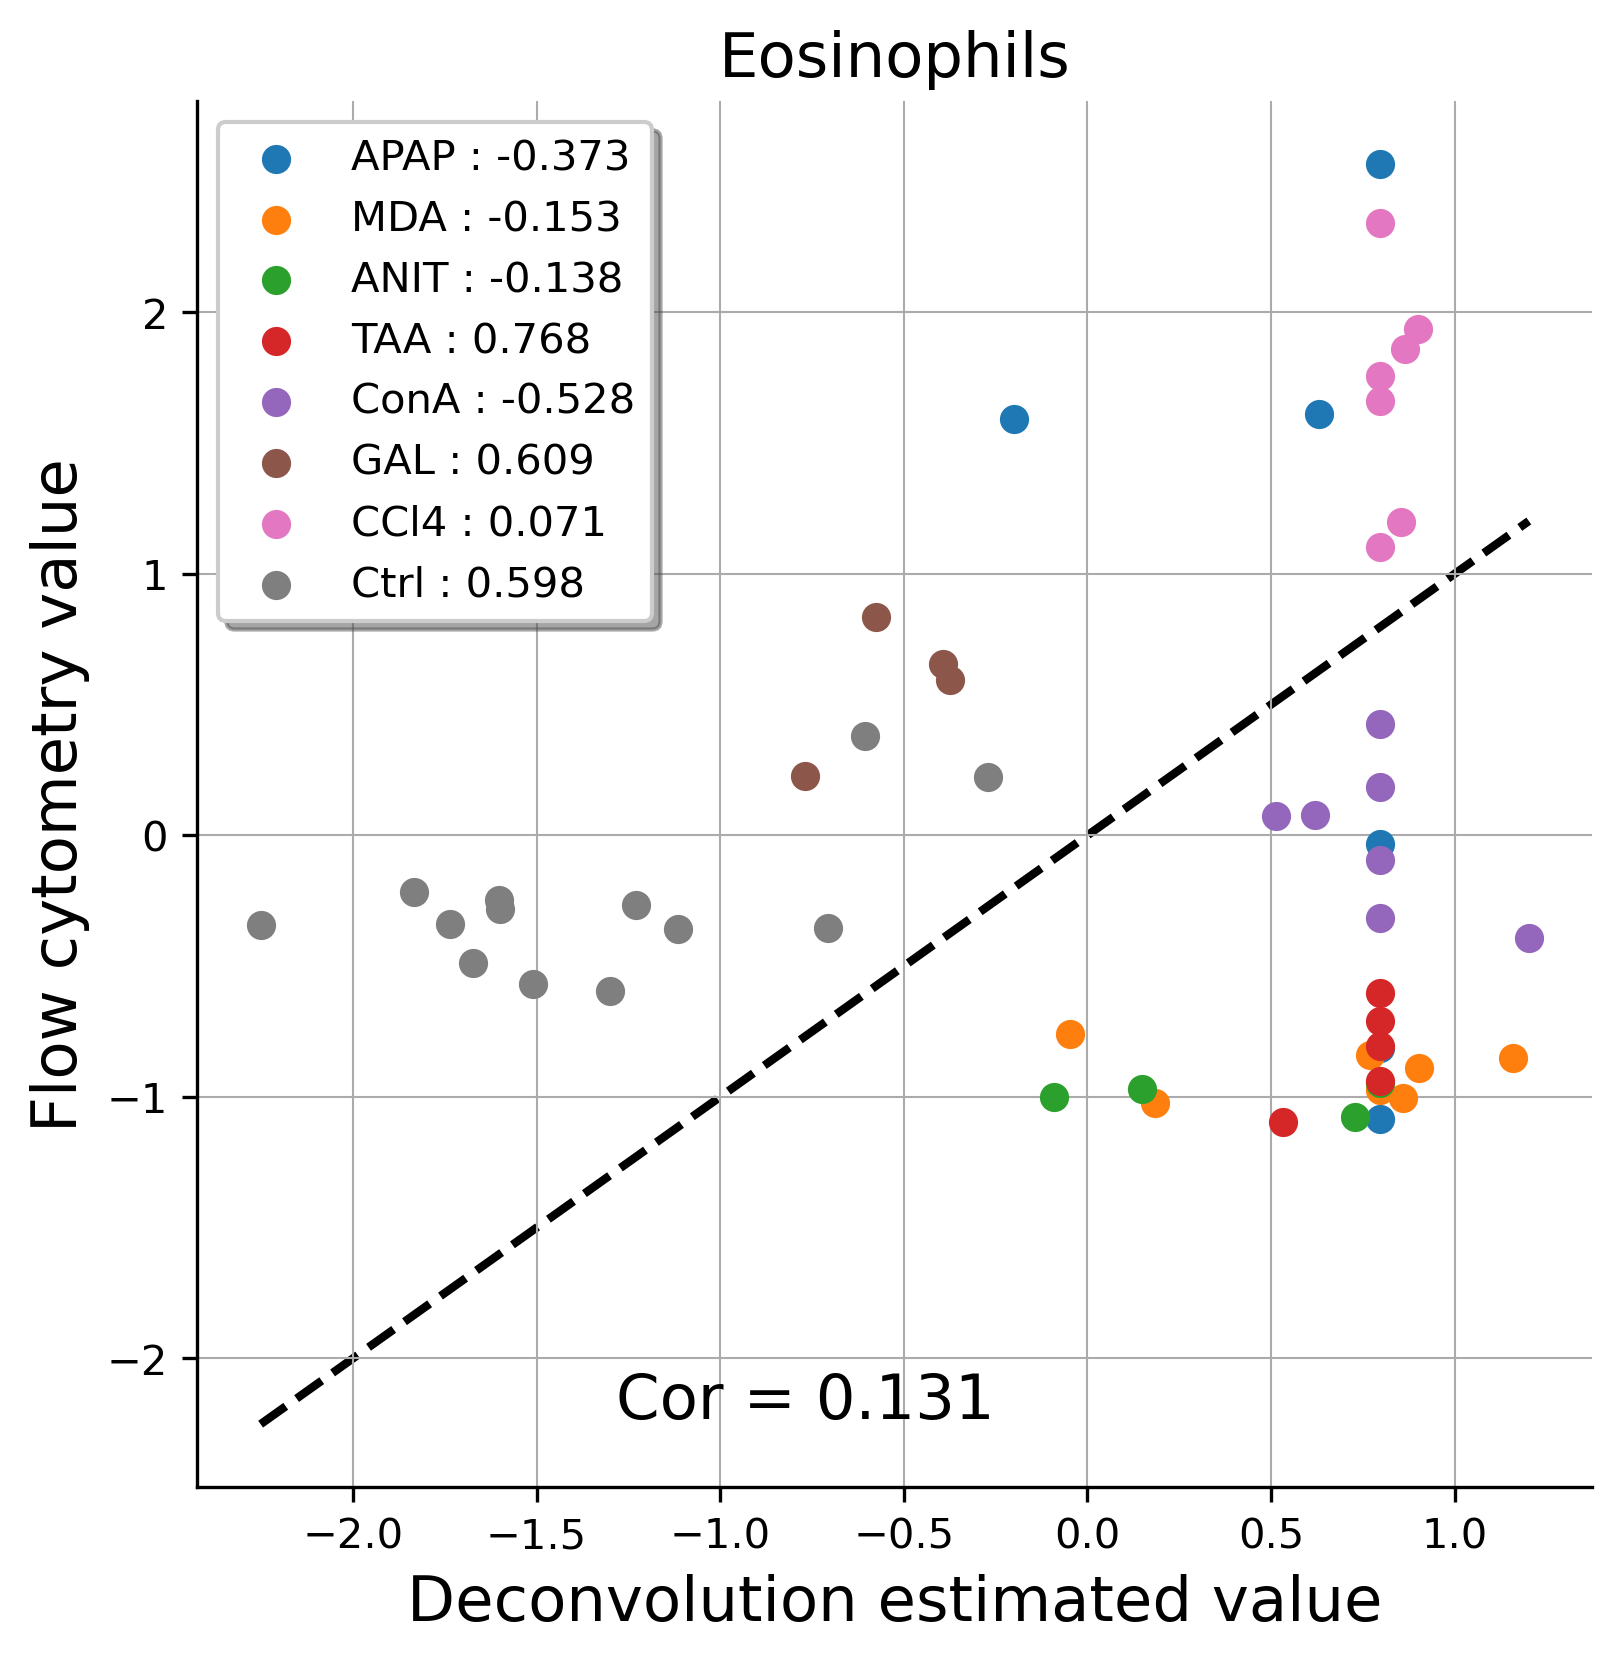

In [6]:
from Evaluation import evaluator

val_df = pd.read_csv('C:/github/LiverDeconv/Data/processed/facs_true_population.csv',index_col=0)

ev = evaluator.Evaluator()
ev.set_deconv_res(res_df=res,z_score=True)
ev.remove_samples(remove_list=["CIV_7","CIV_8","CIP_7","CIP_8"])
ev.set_validation_ref(val_df=val_df)
ev.process_validation_ref(z_score=True)

ev.evaluate(dec_names=[["Neutrophil"]],
            val_names=[["Neutrophil"]],sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4","Ctrl"],title="Neutrophils",do_plot=True,simple=False,eval_all=False,dpi=300)
ev.evaluate(dec_names=[["Monocyte"]],
            val_names=[["Monocyte"]],sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4","Ctrl"],title="Monocytes",do_plot=True,simple=False,eval_all=False,dpi=300)
ev.evaluate(dec_names=[["NK"]],
            val_names=[["NK"]],sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4","Ctrl"],title="NK cells",do_plot=True,simple=False,eval_all=False,dpi=300)
ev.evaluate(dec_names=[["Eosinophil"]],
            val_names=[["Eosinophil"]],sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4","Ctrl"],title="Eosinophils",do_plot=True,simple=False,eval_all=False,dpi=300)

***
#### 4. Summary
- Neutrophil : 0.452
- Monocyte : 0.322
- NK : 0.629
- Eosinophil : 0.131